# Forecasting using ARIMA Model

In [2]:
# Importing the Libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

!pip install statsmodels
from statsmodels.tsa.seasonal import seasonal_decompose

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 40.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.9/233.9 kB 20.4 MB/s eta 0:00:00


In [16]:
# Read the exchange_rate dataset
df = pd.read_csv('exchange_rate.csv', parse_dates=True)
df.head()


,date,Ex_rate
0,01-01-1990 00:00,0.7855
1,02-01-1990 00:00,0.7818
2,03-01-1990 00:00,0.7867
3,04-01-1990 00:00,0.7860
4,05-01-1990 00:00,0.7849


In [17]:
df.columns

Index(['date', 'Ex_rate'], dtype='object')

In [19]:
df.shape

(7588, 2)

In [18]:
# Correct the date format issue and reattempt conversion
df['date'] = pd.to_datetime(df['date'], format='%d-%m-%Y %H:%M')
df = df.drop_duplicates()

# Check for duplicates to confirm removal
print(df.duplicated().sum())
print(df.head())

0
        date  Ex_rate
0 1990-01-01   0.7855
1 1990-01-02   0.7818
2 1990-01-03   0.7867
3 1990-01-04   0.7860
4 1990-01-05   0.7849


In [20]:
df.shape

(7588, 2)

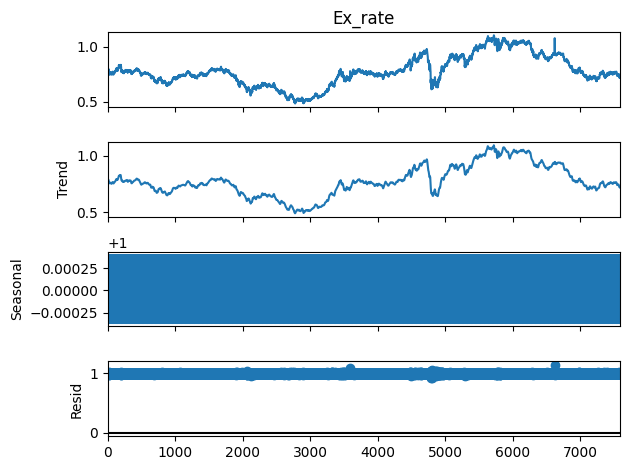

In [21]:
result = seasonal_decompose(df['Ex_rate'], model='multiplicative',period=12)
result.plot()
plt.show()

In [22]:
# To install the library
!pip install pmdarima

# Import the library
from pmdarima import auto_arima

# Ignore harmless warnings
import warnings
warnings.filterwarnings('ignore')

In [23]:
# Fit auto_arima function to Exchange_rate dataset
stepwise_fit = auto_arima(df['Ex_rate'], start_p = 1, start_q = 1,
                          max_p = 3, max_q = 3, m=12,
                          start_P = 0, seasonal = True,
                          d = None, D = 1, trace = True,
                          error_action='ignore',
                          suppress_warnings = True,
                          stepwise=True)
# Print the summary
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=-55122.884, Time=20.04 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=-39021.751, Time=0.95 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=-52953.427, Time=10.58 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=-44928.008, Time=10.09 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=-39023.492, Time=0.41 sec
 ARIMA(1,0,1)(0,1,0)[12] intercept   : AIC=-51126.654, Time=1.79 sec
 ARIMA(1,0,1)(1,1,1)[12] intercept   : AIC=-54705.786, Time=22.11 sec
 ARIMA(1,0,1)(0,1,2)[12] intercept   : AIC=-54229.294, Time=28.09 sec
 ARIMA(1,0,1)(1,1,0)[12] intercept   : AIC=-53039.413, Time=10.52 sec
 ARIMA(1,0,1)(1,1,2)[12] intercept   : AIC=-54854.441, Time=54.55 sec
 ARIMA(1,0,0)(0,1,1)[12] intercept   : AIC=inf, Time=18.75 sec
 ARIMA(2,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=28.63 sec
 ARIMA(1,0,2)(0,1,1)[12] intercept   : AIC=-54437.645, Time=22.15 sec
 ARIMA(0,0,0)(0,1,1)[12] intercept   : AIC=-39022.843, Time=6.69

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                 7588
Model:             SARIMAX(1, 0, 1)x(0, 1, 1, 12)   Log Likelihood               27566.442
Date:                            Sun, 12 May 2024   AIC                         -55122.884
Time:                                    15:53:45   BIC                         -55088.220
Sample:                                         0   HQIC                        -55110.987
                                           - 7588                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept  -4.956e-05   1.47e-05     -3.365      0.001   -7.84e-05   -2.07e-05
ar.L1          0.9676      0.001    671.764      0.000       0.965       0.970
ma.L1         -0.0356      0.003    -11.829      0.000      -0.041      -0.030
ma.S.L12      -0.8000      0.004   -198.115      0.000      -0.808      -0.792
sigma2      3.866e-05   1.21e-07    319.452      0.000    3.84e-05    3.89e-05
===================================================================================
Ljung-Box (L1) (Q):                  30.32   Jarque-Bera (JB):           2341721.32
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               3.10   Skew:                            -0.16
Prob(H) (two-sided):                  0.00   Kurtosis:                        89.13
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [24]:
# Split data into train /test sets
train = df.iloc[:len(df)-12]
test = df.iloc[len(df)-12:]

In [9]:
# train = df.iloc[:len(df)-12]
# test = df.iloc[len(df)-12:]

# The line `train = df.iloc[:len(df)-12]` creates a new DataFrame called `train` that contains all rows of the original DataFrame `df` except the last 12 rows. This is done by slicing the DataFrame using the `iloc` method, which allows you to select rows and columns by integer location. The `:` operator selects all rows, and the `len(df)-12` expression calculates the index of the first row that should be excluded from the `train` DataFrame.

# Similarly, the line `test = df.iloc[len(df)-12:]` creates a new DataFrame called `test` that contains only the last 12 rows of the original DataFrame `df`. This is done by slicing the DataFrame using the `iloc` method again, but this time the slice starts from the index of the first row that should be included in the `test` DataFrame (which is `len(df)-12`) and goes all the way to the end of the DataFrame.

# In summary, the lines `train = df.iloc[:len(df)-12]` and `test = df.iloc[len(df)-12:]` split the original DataFrame `df` into two new DataFrames, `train` and `test`, containing the first len(df)-12 rows and the last 12 rows, respectively. This is a common practice in time series analysis and machine learning, where you typically want to train your model on a historical dataset (the `train` DataFrame) and then evaluate its performance on a more recent dataset (the `test` DataFrame).

In [25]:
# Fit a SARIMAX() x () on training set
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(train['Ex_rate'],
                order = (1,0,1),
                seasonal_order = (0,1,1,12))
result = model.fit()
result.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                            Ex_rate   No. Observations:                 7576
Model:             SARIMAX(1, 0, 1)x(0, 1, 1, 12)   Log Likelihood               27889.677
Date:                            Sun, 12 May 2024   AIC                         -55771.355
Time:                                    15:55:23   BIC                         -55743.630
Sample:                                         0   HQIC                        -55761.838
                                           - 7576                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9953      0.001   1188.979      0.000       0.994       0.997
ma.L1         -0.1363      0.002    -62.153      0.000      -0.141      -0.132
ma.S.L12      -0.9741      0.004   -274.323      0.000      -0.981      -0.967
sigma2      3.644e-05   1.03e-07    354.605      0.000    3.62e-05    3.66e-05
===================================================================================
Ljung-Box (L1) (Q):                   0.91   Jarque-Bera (JB):           2600707.43
Prob(Q):                              0.34   Prob(JB):                         0.00
Heteroskedasticity (H):               2.98   Skew:                             0.27
Prob(H) (two-sided):                  0.00   Kurtosis:                        93.84
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<Axes: >

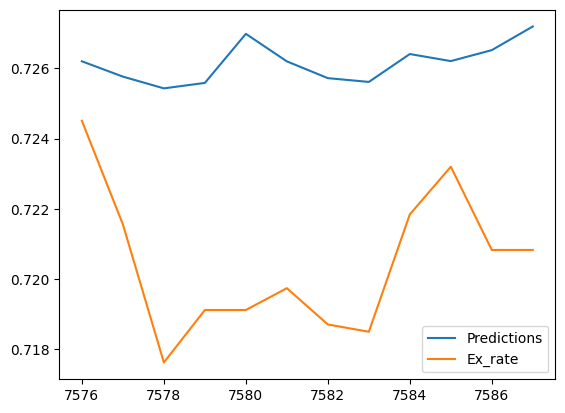

In [27]:
start = len(train)
end = len(train) + len(test) - 1

# Predictions for one-year against the test set
predictions = result.predict(start, end,
                             typ = 'levels').rename('Predictions')

# Plot predictions and actual values
predictions.plot(legend=True)
test['Ex_rate'].plot(legend=True)
# plt.show()

In [28]:
# Load specific evaluation tools
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse

# Calculate root mean squared error
print(rmse(test["Ex_rate"], predictions))

# Calculate mean squared error
mean_squared_error(test["Ex_rate"], predictions)


0.005987618716226955


3.5851577890911325e-05

<Axes: >

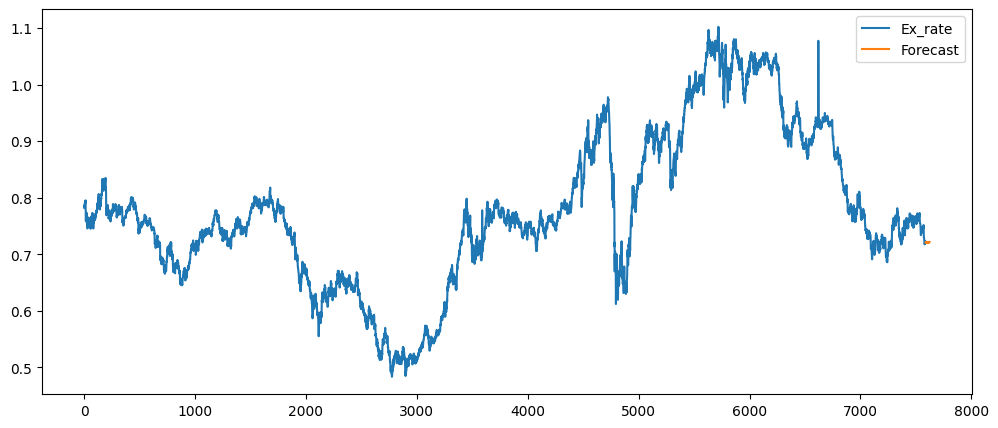

In [30]:
# Train the model on the full dataset
model = model = SARIMAX(df['Ex_rate'],
						order = (1, 0, 1),
						seasonal_order =(0, 1, 1, 12))
result = model.fit()

# Forecast for the next 3 years
forecast = result.predict(start = len(df),
						end = (len(df)-1) + 3 * 12,
						typ = 'levels').rename('Forecast')

# Plot the forecast values
df['Ex_rate'].plot(figsize = (12, 5), legend = True)
forecast.plot(legend = True)

# Applying Exponential Smoothing

In [31]:
import seaborn as sns
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import Holt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

<Axes: >

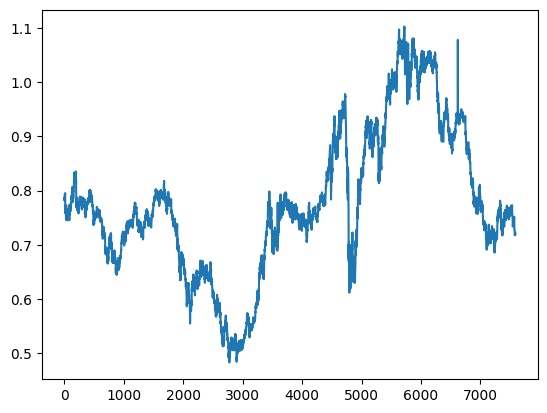

In [33]:
df.Ex_rate.plot()

In [34]:
df.shape

(7588, 2)

# Moving Average

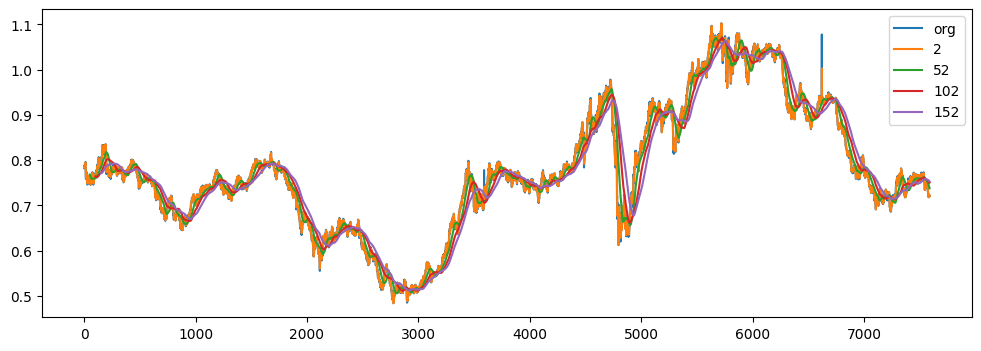

In [46]:
plt.figure(figsize=(12,4))
df.Ex_rate.plot(label='org')
for i in range(2,200,50):
  df['Ex_rate'].rolling(i).mean().plot(label=str(i))
plt.legend(loc='best')

# ACF plots and PACF plots


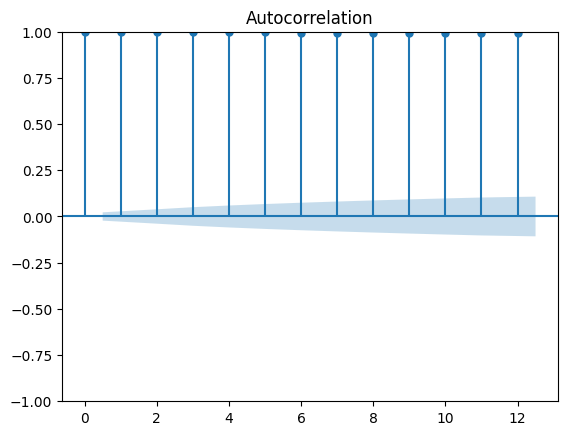

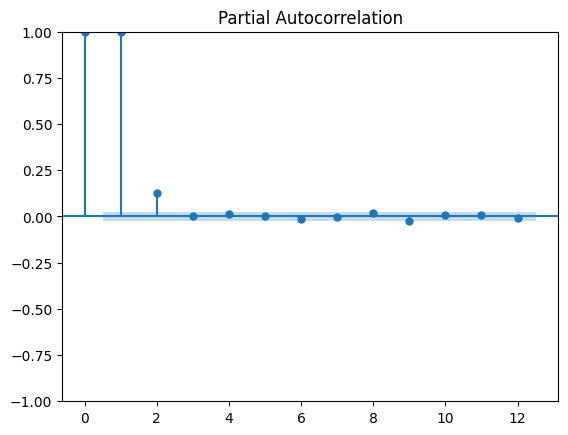

In [48]:
import statsmodels.graphics.tsaplots as tsa_plots
tsa_plots.plot_acf(df.Ex_rate,lags=12)
tsa_plots.plot_pacf(df.Ex_rate,lags=12)
plt.show()

### Evaluation Metric MAPE

In [49]:
# Similar to RMSE, MSE, we have MAPE:Mean Absolute Percentage Error

def MAPE(pred,org):
    temp = np.abs((pred-org)/org)*100
    return np.mean(temp)

### Simple Exponential Method

In [50]:
train["Ex_rate"] = train["Ex_rate"].astype('double')
ses_model = SimpleExpSmoothing(train["Ex_rate"]).fit(smoothing_level=0.2)
pred_ses = ses_model.predict(start = test.index[0],end = test.index[-1])
MAPE(pred_ses,test.Ex_rate)

1.7850450050387263

### Holt method

In [51]:
# Holt method
hw_model = Holt(train["Ex_rate"]).fit(smoothing_level=0.8, smoothing_slope=0.2)
pred_hw = hw_model.predict(start = test.index[0],end = test.index[-1])
MAPE(pred_hw,test.Ex_rate)

1.3338643657074236

### Holts winter exponential smoothing with additive seasonality and additive trend

In [52]:
hwe_model_add_add = ExponentialSmoothing(train["Ex_rate"],seasonal="add",trend="add",seasonal_periods=12).fit() #add the trend to the model
pred_hwe_add_add = hwe_model_add_add.predict(start = test.index[0],end = test.index[-1])
MAPE(pred_hwe_add_add,test.Ex_rate)

0.631880813311719

### Holts winter exponential smoothing with multiplicative seasonality and additive trend

In [53]:
hwe_model_mul_add = ExponentialSmoothing(train["Ex_rate"],seasonal="mul",trend="add",seasonal_periods=12).fit()
pred_hwe_mul_add = hwe_model_mul_add.predict(start = test.index[0],end = test.index[-1])
MAPE(pred_hwe_mul_add,test.Ex_rate)

0.6024599837950425

## Final Model by combining train and test

In [54]:
df["Ex_rate"] = df["Ex_rate"].astype('double')
hwe_model_mul_add = ExponentialSmoothing(df["Ex_rate"],seasonal="add",trend="add",seasonal_periods=12).fit()

In [55]:
#Forecasting for next 10 time periods
hwe_model_mul_add.forecast(10)

7588    0.720812
7589    0.720594
7590    0.720259
7591    0.720517
7592    0.720355
7593    0.720477
7594    0.720537
7595    0.720242
7596    0.720423
7597    0.720464
dtype: float64